## Computer vision application
## Data engineering

This project aims to explore the computer vision field, from image processing operations to image classification. The data used here is made upon *2527 different images of garbage from 6 different classes*: cardboard, glass, metal, paper, plastic, trash. The ultimate goal is to develop an image classifier model that, after trained and validated using specific datasets, is able to predict the probabilities that a given image belongs to each of those classes. Again, a specific test dataset is applied to evaluate model performance. To achieve that goal, different code artifacts were generated:
* Python modules for image processing and to support model development.
* Notebooks of data engineering and data preparation that apply different operations over images (flip, crop, change in brightness, and so on).
* Notebooks of data modeling that implement experimentation to find the best image classifier model, analysis of the most relevant models and creation of codes to apply the best one in production.

-----------

This notebook reads images, describes the dataset and applies a series of different image operations (crop, resize, flip, filters, and so on).

**Sumário:**
1. [Libraries](#libraries)<a href='#libraries'></a>.
2. [Functions and classes](#functions_classes)<a href='#functions_classes'></a>.
3. [Settings](#settings)<a href='#settings'></a>.


4. [Data understanding, importing and cleaning](#data_und_imp_clean)<a href='#data_und_imp_clean'></a>.
  * [Data understanding](#data_und)<a href='#data_und'></a>.
  * [Data importing](#data_importing)<a href='#data_importing'></a>.
  * [Data cleaning](#data_cleaning)<a href='#data_cleaning'></a>.


5. [Exploratory data analysis](#eda)<a href='#eda'></a>.
  * [Plotting images](#plotting_imgs)<a href='#plotting_imgs'></a>.
  * [Operations over images](#operations_imgs)<a href='#operations_imgs'></a>.

<a id='libraries'></a>

## Libraries





In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/MyDrive/Studies/computer_vision/notebooks/"

/content/gdrive/MyDrive/Studies/computer_vision/Codes


In [ ]:
# !pip install -r ../requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import os
import json
from datetime import datetime
import time
import cv2
import matplotlib.pyplot as plt

In [ ]:
import sys

sys.path.append(
    os.path.abspath(
        os.path.join(
            os.path.dirname(__doc__), '../src'
        )
    )
)

<a id='functions_classes'></a>

## Functions and classes

In [ ]:
from utils import frequency_list
from data_eng import ImportCleanImages
from transformations import brightness_filter, contrast_filter, saturation_filter

<a id='settings'></a>

## Settings

In [ ]:
# Declare whether outcomes should be exported:
export = False

# Declare if images should be imported in grey scale:
grey_scale = False

<a id='data_und_imp_clean'></a>

## Data understanding, importing and cleaning

<a id='data_und'></a>

### Data understanding

#### Available classes

In [ ]:
classes = os.listdir('../data/images/')
print(f'Number of classes: {len(classes)}.')
print(classes)

Number of classes: 6.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
# Dictionary with label by class:
label_dict = dict(zip(classes, [i+1 for i in range(len(classes))]))
print(label_dict)

{'cardboard': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5, 'trash': 6}


#### Images by class

In [ ]:
num_images = [len(os.listdir(f'../data/images/{c}')) for c in classes]
print(f'Total number of images: {sum(num_images)}.')
print(f'Number of non-trash images: {sum([n for n in num_images if num_images.index(n)!=classes.index("trash")])}.')
print('Number of images by class:')
print(dict(zip(classes, num_images)))

Total number of images: 2527.
Number of non-trash images: 2390.
Number of images by class:
{'cardboard': 403, 'glass': 501, 'metal': 410, 'paper': 594, 'plastic': 482, 'trash': 137}


#### Files format

In [ ]:
dict(zip(classes, [list(np.unique([i.split('.')[1] for i in os.listdir(f'../Datasets/images/{c}')])) for c in classes]))

{'cardboard': ['jpg'],
 'glass': ['jpg'],
 'metal': ['jpg'],
 'paper': ['jpg'],
 'plastic': ['jpg'],
 'trash': ['jpg']}

<a id='data_importing'></a>

### Data importing

#### Train-validation-test split

In [ ]:
# File names of each dataset:
train_images = [f.split('.')[0] for f in list(pd.read_csv('../data/train_images.txt', sep=' ', header=None)[0])]
val_images = [f.split('.')[0] for f in list(pd.read_csv('../data/val_images.txt', sep=' ', header=None)[0])]
test_images = [f.split('.')[0] for f in list(pd.read_csv('../data/test_images.txt', sep=' ', header=None)[0])]

#### Importing the data

Check this [link](https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html) for the available flags for reading images and converting them into matrices using opencv2.

Training data

In [ ]:
images_train = {}

# Loop over classes:
for c in classes:
  images_train[c] = dict(
      zip(
          # Identification of images:
          [i.split('.')[0] for i in os.listdir(f'../data/images/{c}') if i.split('.')[0] in train_images],
          # Reading the images:
          [cv2.cvtColor(cv2.imread(f'../data/images/{c}/{i}', 0 if grey_scale else -1),
                        cv2.COLOR_BGR2RGB) for i in os.listdir(f'../data/images/{c}') if
           i.split('.')[0] in train_images]
      )
  )

Validation data

In [ ]:
images_val = {}

# Loop over classes:
for c in classes:
  images_val[c] = dict(
      zip(
          # Identification of images:
          [i.split('.')[0] for i in os.listdir(f'../data/images/{c}') if i.split('.')[0] in val_images],
          # Reading the images:
          [cv2.cvtColor(cv2.imread(f'../data/images/{c}/{i}', 0 if grey_scale else -1),
                        cv2.COLOR_BGR2RGB) for i in os.listdir(f'../data/images/{c}') if
           i.split('.')[0] in val_images]
      )
  )

Test data

In [ ]:
images_test = {}

# Loop over classes:
for c in classes:
  images_test[c] = dict(
      zip(
          # Identification of images:
          [i.split('.')[0] for i in os.listdir(f'../data/images/{c}') if i.split('.')[0] in test_images],
          # Reading the images:
          [cv2.cvtColor(cv2.imread(f'../data/images/{c}/{i}', 0 if grey_scale else -1),
                        cv2.COLOR_BGR2RGB) for i in os.listdir(f'../data/images/{c}') if
           i.split('.')[0] in test_images]
      )
  )

#### Describing the data

Data types

In [ ]:
data_types = dict(zip(classes, [[] for i in range(len(classes))]))

# Loop over datasets:
for d in [images_train, images_val, images_test]:
  # Loop over classes:
  for c in classes:
    data_types[c].extend(list(np.unique([str(type(d[c][k])) for k in d[c]])))

# Loop over classes:
for c in data_types:
  data_types[c] = list(np.unique(data_types[c]))

data_types

{'cardboard': ["<class 'numpy.ndarray'>"],
 'glass': ["<class 'numpy.ndarray'>"],
 'metal': ["<class 'numpy.ndarray'>"],
 'paper': ["<class 'numpy.ndarray'>"],
 'plastic': ["<class 'numpy.ndarray'>"],
 'trash': ["<class 'numpy.ndarray'>"]}

Dimension of matrices

In [ ]:
dim_matrices = dict(zip(classes, [[] for i in range(len(classes))]))

# Loop over datasets:
for d in [images_train, images_val, images_test]:
  # Loop over classes:
  for c in classes:
    dim_matrices[c].extend(list(np.unique([d[c][k].shape for k in d[c]])))

# Loop over classes:
for c in dim_matrices:
  dim_matrices[c] = list(np.unique(dim_matrices[c]))

dim_matrices

{'cardboard': [3, 384, 512],
 'glass': [3, 384, 512],
 'metal': [3, 384, 512],
 'paper': [3, 384, 512],
 'plastic': [3, 384, 512],
 'trash': [3, 384, 512]}

<a id='data_cleaning'></a>

### Data cleaning

#### Aggregating all images of each class

In [ ]:
labels_train, labels_val, labels_test = {}, {}, {}
ids_train, ids_val, ids_test = {}, {}, {}

# Loop over classes:
for c in classes:
  print(f'\033[1m{c}:\033[0m')

  # Training data:
  ids_train[c] = list(images_train[c].keys()) # Identification of images.
  images_train[c] = np.stack([images_train[c][i] for i in images_train[c]], axis=0) # Collection of images.
  labels_train[c] = [label_dict[c] for i in range(len(images_train[c]))] # Labels of images.
  print(f'Shape of images_train: {images_train[c].shape}.')

  # Validation data:
  ids_val[c] = list(images_val[c].keys()) # Identification of images.
  images_val[c] = np.stack([images_val[c][i] for i in images_val[c]], axis=0) # Collection of images.
  labels_val[c] = np.array([label_dict[c] for i in range(len(images_val[c]))]) # Labels of images.
  print(f'Shape of images_val: {images_val[c].shape}.')

  # Test data:
  ids_test[c] = list(images_test[c].keys()) # Identification of images.
  images_test[c] = np.stack([images_test[c][i] for i in images_test[c]], axis=0) # Collection of images.
  labels_test[c] = [label_dict[c] for i in range(len(images_test[c]))] # Labels of images.
  print(f'Shape of images_test: {images_test[c].shape}.')

cardboard:
Shape of images_train: (287, 384, 512, 3).
Shape of images_val: (46, 384, 512, 3).
Shape of images_test: (70, 384, 512, 3).
glass:
Shape of images_train: (354, 384, 512, 3).
Shape of images_val: (65, 384, 512, 3).
Shape of images_test: (82, 384, 512, 3).
metal:
Shape of images_train: (286, 384, 512, 3).
Shape of images_val: (56, 384, 512, 3).
Shape of images_test: (68, 384, 512, 3).
paper:
Shape of images_train: (403, 384, 512, 3).
Shape of images_val: (83, 384, 512, 3).
Shape of images_test: (108, 384, 512, 3).
plastic:
Shape of images_train: (347, 384, 512, 3).
Shape of images_val: (61, 384, 512, 3).
Shape of images_test: (74, 384, 512, 3).
trash:
Shape of images_train: (91, 384, 512, 3).
Shape of images_val: (17, 384, 512, 3).
Shape of images_test: (29, 384, 512, 3).


#### Aggregating all images

In [ ]:
# Training data:
ids_train = [item for sublist in [ids_train[c] for c in ids_train] for item in sublist] # Identification of images.
images_train = np.concatenate([images_train[c] for c in images_train], axis=0) # Collection of images.
labels_train = [item for sublist in [labels_train[c] for c in labels_train] for item in sublist] # Labels of images.
print(f'Shape of images_train: {images_train.shape}.')
print(f'Distribution of classes (training data):\n{dict(zip(label_dict.keys(),\
                                                            [round(i/len(labels_train), 4) for i in frequency_list(labels_train).values()]))}.\n')

# Validation data:
ids_val = [item for sublist in [ids_val[c] for c in ids_val] for item in sublist] # Identification of images.
images_val = np.concatenate([images_val[c] for c in images_val], axis=0) # Collection of images.
labels_val = [item for sublist in [labels_val[c] for c in labels_val] for item in sublist] # Labels of images.
print(f'Shape of images_val: {images_val.shape}.')
print(f'Distribution of classes (validation data):\n{dict(zip(label_dict.keys(),\
                                                              [round(i/len(labels_val), 4) for i in frequency_list(labels_val).values()]))}.\n')

# Test data:
ids_test = [item for sublist in [ids_test[c] for c in ids_test] for item in sublist] # Identification of images.
images_test = np.concatenate([images_test[c] for c in images_test], axis=0) # Collection of images.
labels_test = [item for sublist in [labels_test[c] for c in labels_test] for item in sublist] # Labels of images.
print(f'Shape of images_test: {images_test.shape}.')
print(f'Distribution of classes (test data):\n{dict(zip(label_dict.keys(),\
                                                        [round(i/len(labels_test), 4) for i in frequency_list(labels_test).values()]))}.\n')

Shape of images_train: (1768, 384, 512, 3).
Distribution of classes (training data):
{'cardboard': 0.1623, 'glass': 0.2002, 'metal': 0.1618, 'paper': 0.2279, 'plastic': 0.1963, 'trash': 0.0515}.

Shape of images_val: (328, 384, 512, 3).
Distribution of classes (validation data):
{'cardboard': 0.1402, 'glass': 0.1982, 'metal': 0.1707, 'paper': 0.253, 'plastic': 0.186, 'trash': 0.0518}.

Shape of images_test: (431, 384, 512, 3).
Distribution of classes (test data):
{'cardboard': 0.1624, 'glass': 0.1903, 'metal': 0.1578, 'paper': 0.2506, 'plastic': 0.1717, 'trash': 0.0673}.



Shuffling the data

In [ ]:
# Shuffling the indexes:
np.random.seed(1)
train_shuffle = list(np.random.choice(range(len(images_train)), size=len(images_train), replace=False))
np.random.seed(1)
val_shuffle = list(np.random.choice(range(len(images_val)), size=len(images_val), replace=False))
np.random.seed(1)
test_shuffle = list(np.random.choice(range(len(images_test)), size=len(images_test), replace=False))

In [ ]:
# Training data:
images_train = images_train[train_shuffle, :, :, :] if grey_scale==False else images_train[train_shuffle, :, :]
labels_train = [labels_train[i] for i in train_shuffle]
ids_train = [ids_train[i] for i in train_shuffle]

# Validation data:
images_val = images_val[val_shuffle, :, :, :] if grey_scale==False else images_val[val_shuffle, :, :]
labels_val = [labels_val[i] for i in val_shuffle]
ids_val = [ids_val[i] for i in val_shuffle]

# Test data:
images_test = images_test[test_shuffle, :, :, :] if grey_scale==False else images_test[test_shuffle, :, :]
labels_test = [labels_test[i] for i in test_shuffle]
ids_test = [ids_test[i] for i in test_shuffle]

Sanity checks

In [ ]:
if len(images_train)!=len(train_images):
  print('Inconsistent number of images between training data and predefined set of training images!')

if len(images_val)!=len(val_images):
  print('Inconsistent number of images between validation data and predefined set of validation images!')

if len(images_test)!=len(test_images):
  print('Inconsistent number of images between test data and predefined set of test images!')

if (len([c for c in ids_train if c not in train_images]) > 0) |\
  (len([c for c in train_images if c not in ids_train]) > 0):
  print('Some images were not found in training data or set of training images!')

if (len([c for c in ids_val if c not in val_images]) > 0) |\
  (len([c for c in val_images if c not in ids_val]) > 0):
  print('Some images were not found in validation data or set of validation images!')

if (len([c for c in ids_test if c not in test_images]) > 0) |\
  (len([c for c in test_images if c not in ids_test]) > 0):
  print('Some images were not found in test data or set of test images!')

Class for importing and cleaning data

In [ ]:
import_clean = ImportCleanImages(path_to_files='../Datasets', images_folder='images', train_val_test_file='images', shuffle=True, label_dict=label_dict)
datasets = import_clean.build_datasets()

images_train2, labels_train2, ids_train2 = datasets['train']
images_val2, labels_val, ids_val2 = datasets['val']
images_test2, labels_test2, ids_test2 = datasets['test']

if ~(sum(sum(sum(sum(images_train==images_train2))))==np.prod(images_train.shape)) |\
  ~(sum(sum(sum(sum(images_val==images_val2))))==np.prod(images_val.shape)) | ~(sum(sum(sum(sum(images_test==images_test2))))==np.prod(images_test.shape)):
  print('Inconsistent data between procedural and class codes!')

In [ ]:
del images_train2, labels_train2, ids_train2, images_val2, labels_val, ids_val2, images_test2, labels_test2, ids_test2

<a id='eda'></a>

## Exploratory data analysis

<a id='plotting_imgs'></a>

### Plotting images

cardboard352


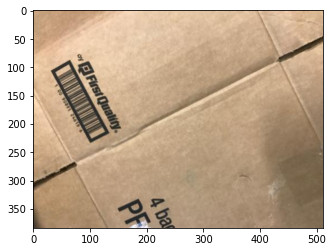

glass266


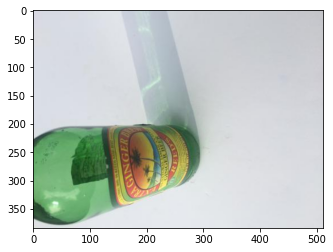

metal71


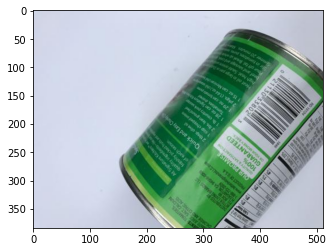

paper533


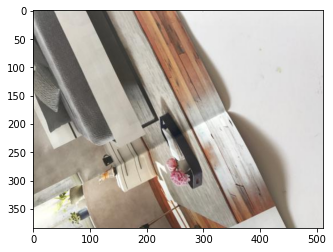

plastic303


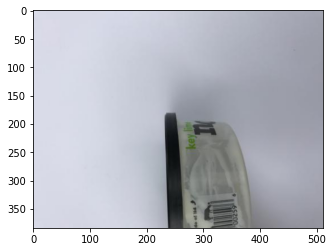

trash50


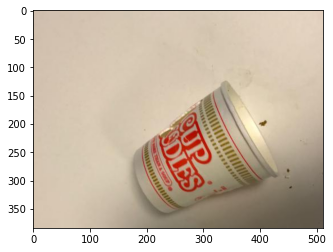

In [ ]:
sample_imgs = [item for sublist in [np.random.choice([i for i in ids_train if c in i], size=1, replace=False) for c in classes] for item in sublist]

# Loop over sampled images:
for idx in [ids_train.index(i) for i in sample_imgs]:
  print(ids_train[idx])
  plt.imshow(images_train[idx])
  plt.show()

#### Single color channel

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

# Red image:
red_img = images_train[sample_idx].copy()
red_img[:, :, 1] = 0
red_img[:, :, 2] = 0

# Green image:
green_img = images_train[sample_idx].copy()
green_img[:, :, 0] = 0
green_img[:, :, 2] = 0

# Blue image:
blue_img = images_train[sample_idx].copy()
blue_img[:, :, 0] = 0
blue_img[:, :, 1] = 0

paper298


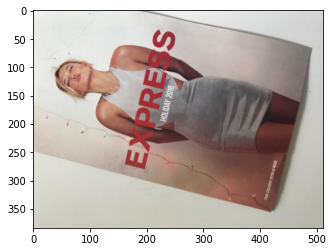

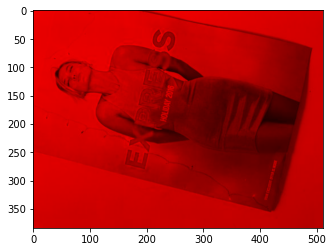

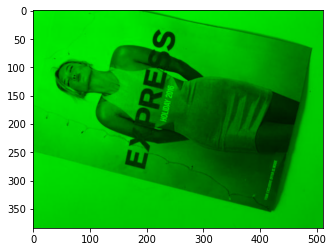

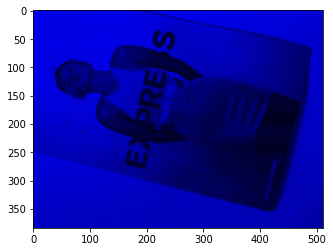

In [ ]:
print(ids_train[sample_idx])

# Loop over sampled images:
for img in [original_img, red_img, green_img, blue_img]:
  plt.imshow(img, cmap=None)
  plt.show()

#### Gray scale

Single color channel in gray scale

paper298


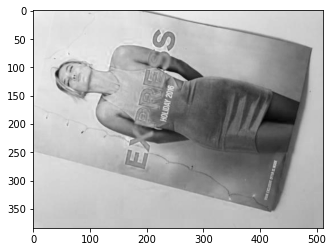

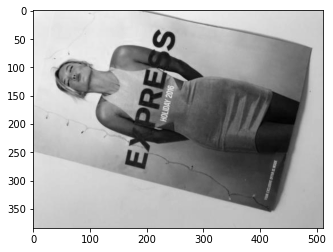

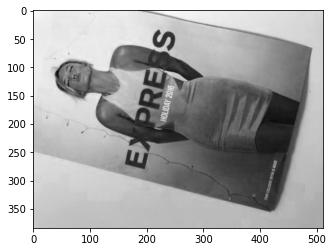

In [ ]:
print(ids_train[sample_idx])

# Loop over sampled images:
for c in [0, 1, 2]:
  plt.imshow(original_img[:, :, c], cmap='gray')
  plt.show()

Multiple color channel in gray scale

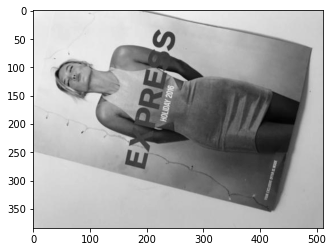

In [ ]:
gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')

Shape of equal_gray_img: (384, 512).


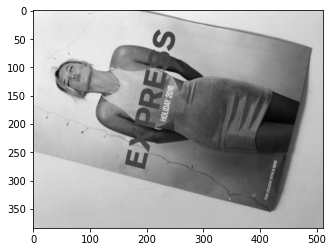

In [ ]:
equal_gray_img = original_img.copy()
equal_gray_img = equal_gray_img[:, :, 0]*0.333 + equal_gray_img[:, :, 1]*0.333 + equal_gray_img[:, :, 2]*0.333
print(f'Shape of equal_gray_img: {equal_gray_img.shape}.')
plt.imshow(equal_gray_img, cmap='gray')

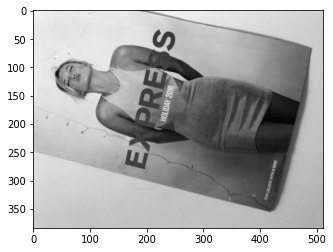

In [ ]:
best_gray_img = original_img.copy()
best_gray_img = best_gray_img[:, :, 0]*0.299 + best_gray_img[:, :, 1]*0.587 + best_gray_img[:, :, 2]*0.114
plt.imshow(best_gray_img, cmap='gray')

Multiple color channel in binary scale

Pixels below the threshold are converted into black, while those above the threshold turn into white. The higher the threshold, the darker the image become.

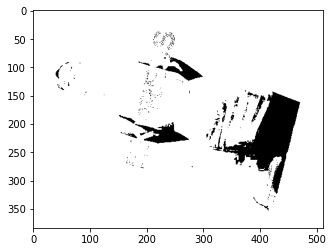

In [ ]:
ret0, thres0 = cv2.threshold(gray_img, 75, 255, cv2.THRESH_BINARY)
plt.imshow(thres0, cmap='gray')

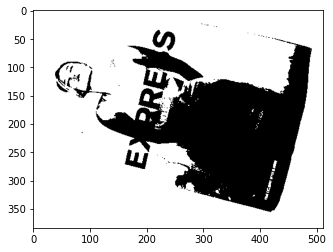

In [ ]:
ret1, thres0 = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thres0, cmap='gray')

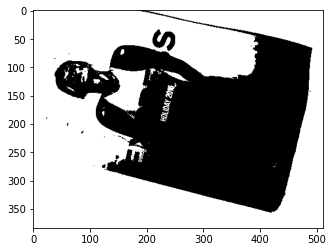

In [ ]:
ret2, thres0 = cv2.threshold(gray_img, 175, 255, cv2.THRESH_BINARY)
plt.imshow(thres0, cmap='gray')

<a id='operations_imgs'></a>

### Operations over images

A **digital** image depicts an image as a *discretized* version of a function, $f: \mathbb{R}^2 → \mathbb{R}$, where, for each position $(x, y)$ in a matrix, an intensity, or color depth $f(x, y)$ is returned. Such values $\{f(x, y)\}$ are called **pixels** (picture elements). Given a *color space* as the RGB color map (red-green-blue), a pixel is a vector $f(x, y) = (f_R(x, y), f_G(x, y), f_B(x, y))$ that brings color intensities in each of the color channels.

An operation transforms an input image into another image, which can have the same or a different dimension. Since mathematically an image consists of a matrix, or collection of matrices, operations must affect the pixels, i.e., the values of entries in such matrices. A **point operation** has the pixels of the ouput image depending on the respective pixels of the input image. A **local operation**, in its turn, is such that each pixel in the output image depends on a neighborhood of $p$ $x$ $p$ pixels in the input image. Finally, in a **global operation** each pixel of the output image depends on all pixels in the input image.

#### Crop operation

Operation under which a zoom-in is applied over an image. Consequently, only a subset of the matrices that compose the image is preserved. In order to keep the dimension of the image equal, a resize operation should also be applied or a background should be created for the cropped image. The operation is implemented by collecting sub-matrices of the original representation of the image, i.e., by taking subsets of contiguous rows and contiguous columns of each color channel.

Shape of plastic470: (384, 512, 3).


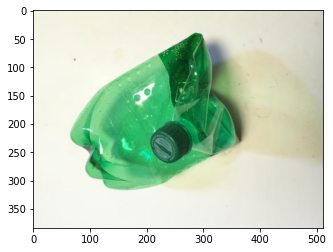

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.')
plt.imshow(original_img, cmap=None)

Shape of cropped plastic470: (200, 200, 3).


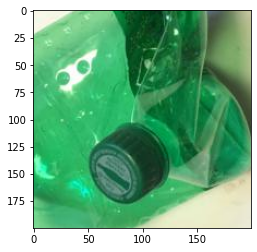

In [ ]:
# Original dimensions:
height, width, channels = original_img.shape

# Cropped dimensions:
cropped_height = height//2
cropped_width = width//2

# Cropped image:
cropped_img = original_img[cropped_height-100: cropped_height+100, cropped_width-100: cropped_width+100, :]

print(f'Shape of cropped {ids_train[sample_idx]}: {cropped_img.shape}.')
plt.imshow(cropped_img, cmap=None)

Shape of plastic192: (384, 512, 3).


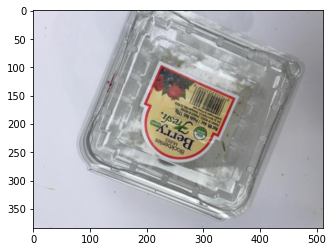

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.')
plt.imshow(original_img, cmap=None)

Shape of cropped plastic192: (200, 200, 3).


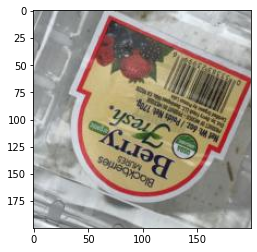

In [ ]:
# Original dimensions:
height, width, channels = original_img.shape

# Cropped dimensions:
cropped_height = height//2
cropped_width = width//2

# Cropped image:
cropped_img = original_img[cropped_height-100: cropped_height+100, cropped_width-100: cropped_width+100, :]

print(f'Shape of cropped {ids_train[sample_idx]}: {cropped_img.shape}.')
plt.imshow(cropped_img, cmap=None)

Shape of plastic192: (384, 512, 3).


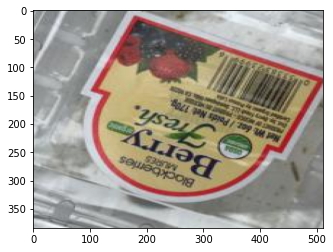

In [ ]:
# Resized dimensions:
resized_width = 512
resized_height = 384

# Resized image:
resized_cropped_img = cv2.resize(
    cropped_img,
    (resized_width, resized_height),
    interpolation=cv2.INTER_AREA
)

print(f'Shape of {ids_train[sample_idx]}: {resized_cropped_img.shape}.')
plt.imshow(resized_cropped_img, cmap=None)

#### Resize operation

This operation changes the dimension of the matrix representation of an image. Its implementation can make use of opencv [resize function](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d). The main arguments for resizing an image using opencv is the original image (in its matrix representation), followed by a tuple with the width and height, and the [interpolation method](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121) to be used.

Shape of cardboard166: (384, 512, 3).


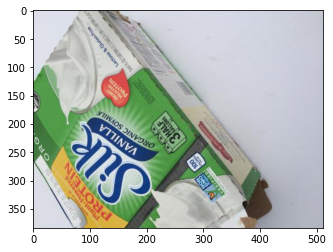

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.')
plt.imshow(original_img, cmap=None)

Shape of cardboard166: (768, 512, 3).


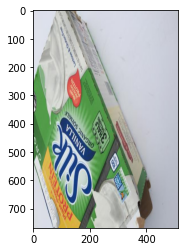

In [ ]:
# Original dimensions:
height, width, channels = original_img.shape

# Resized dimensions:
resized_height = height*2
resized_width = width

# Resized image:
resized_img = cv2.resize(
    original_img,
    (resized_width, resized_height),
    interpolation=cv2.INTER_NEAREST
)

print(f'Shape of {ids_train[sample_idx]}: {resized_img.shape}.')
plt.imshow(resized_img, cmap=None)

Shape of cardboard166: (384, 1024, 3).


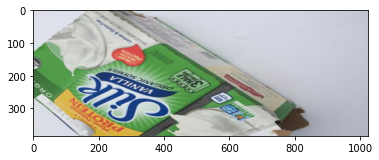

In [ ]:
# Resized dimensions:
resized_height = height
resized_width = width*2

# Resized image:
resized_img = cv2.resize(
    original_img,
    (resized_width, resized_height),
    interpolation=cv2.INTER_LINEAR
)

print(f'Shape of {ids_train[sample_idx]}: {resized_img.shape}.')
plt.imshow(resized_img, cmap=None)

Shape of cardboard166: (450, 600, 3).


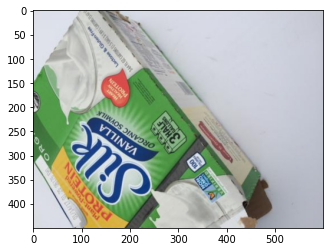

In [ ]:
ratio = float(height/width)

# Resized dimensions:
resized_width = 600
resized_height = int(resized_width*ratio)

# Resized image:
resized_img = cv2.resize(
    original_img,
    (resized_width, resized_height),
    interpolation=cv2.INTER_AREA
)

print(f'Shape of {ids_train[sample_idx]}: {resized_img.shape}.')
plt.imshow(resized_img, cmap=None)

#### Flip operation

The flip operation means changing pixels location similarly to putting it against a mirror. The opencv [flip function](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441) allows the flipping of an image along the x-axis (positive flag, 1) or the y-axis (zero flag), or even in both axis (negative flag, -1). The synthax of flip operation is simple, since it requires only the original image and the flag indicating how the flip should be done.

Shape of plastic351: (384, 512, 3).


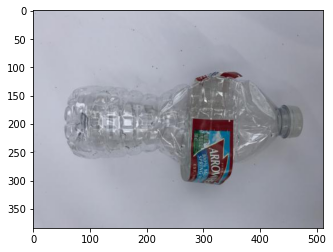

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.')
plt.imshow(original_img, cmap=None)

Shape of plastic351: (384, 512, 3).


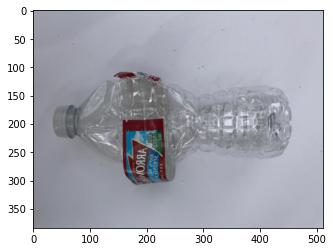

In [ ]:
# Horizontal flipped image:
hor_flipped_img = cv2.flip(original_img, 1)

print(f'Shape of {ids_train[sample_idx]}: {hor_flipped_img.shape}.')
plt.imshow(hor_flipped_img, cmap=None)

Shape of plastic351: (384, 512, 3).


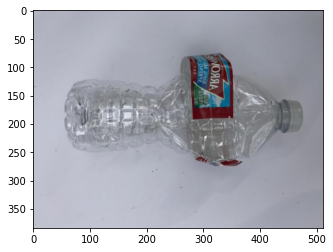

In [ ]:
# Vertical flipped image:
ver_flipped_img = cv2.flip(original_img, 0)

print(f'Shape of {ids_train[sample_idx]}: {ver_flipped_img.shape}.')
plt.imshow(ver_flipped_img, cmap=None)

Shape of plastic351: (384, 512, 3).


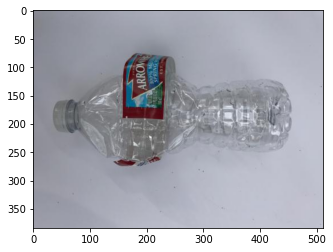

In [ ]:
# Horizontal and vertical flipped image:
hor_ver_flipped_img = cv2.flip(original_img, -1)

print(f'Shape of {ids_train[sample_idx]}: {hor_ver_flipped_img.shape}.')
plt.imshow(hor_ver_flipped_img, cmap=None)

#### Rotate operation

The rotation of an image moves it around its axes according to some specified angle. To rotate an image using opencv it is necessary to use two different functionalities: [getRotationMatrix2D](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326) and [warpAffine](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983). The first defines the affine matrix that will produce the rotation according to the location of the image's center, the angle of the rotation and some scale. The second receives the original image, the affine matrix, and a tuple with width and height of the output image, along with some optional parameters for interpolation and border handling.

Shape of cardboard393: (384, 512, 3).


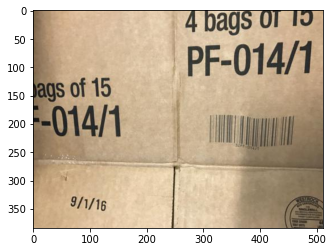

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.')
plt.imshow(original_img, cmap=None)

In [ ]:
# Original dimensions:
height, width, channels = original_img.shape
center = (height//2, width//2)

# Rotation matrix:
M = cv2.getRotationMatrix2D(
    center,
    angle=45,
    scale=1.0
)

print(M)

[[   0.70710678    0.70710678 -124.78383797]
 [  -0.70710678    0.70710678  210.745166  ]]


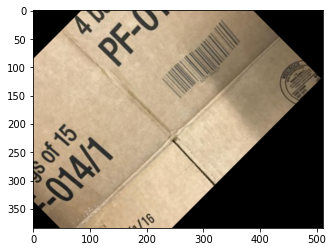

In [ ]:
# Rotated image:
rotated_img = cv2.warpAffine(
    original_img,
    M,
    (width, height)
)
plt.imshow(rotated_img, cmap=None)

[[ 6.123234e-17  1.000000e+00 -6.400000e+01]
 [-1.000000e+00  6.123234e-17  4.480000e+02]]


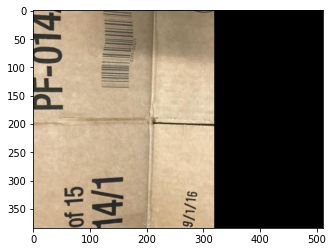

In [ ]:
# Rotation matrix:
M = cv2.getRotationMatrix2D(
    center,
    angle=90,
    scale=1.0
)

print(M)

# Rotated image:
rotated_img = cv2.warpAffine(
    original_img,
    M,
    (width, height)
)
plt.imshow(rotated_img, cmap=None)

#### Translation/shift operation

This transformation changes the position of the image in the plot by either moving it horizontally or vertically. Check this [reference](https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html) for implementing translations with opencv. There are two parameters that configure the translation matrix ($3x3$): $t_x$ and $t_y$, the amount of pixels that the image should go to the right and to the bottom, respectively. Negative numbers for $t_x$ and $t_y$ move the image to the left and to the top, respectively.

Shape of glass459: (384, 512, 3).


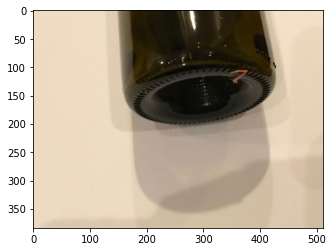

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.')
plt.imshow(original_img, cmap=None)

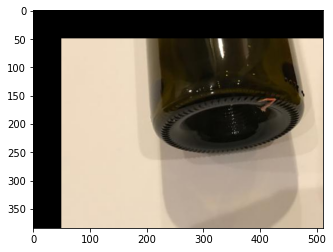

In [ ]:
# Dimensions of the image:
height, width, _ =  original_img.shape

# Translation matrix:
M = np.float32([[1,0,50],[0,1,50]])

# Shifted image:
shifted_img = cv2.warpAffine(original_img, M, (width, height))
plt.imshow(shifted_img, cmap=None)

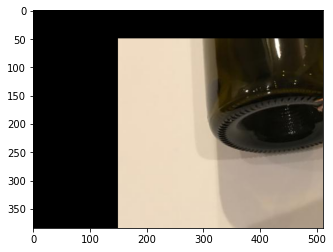

In [ ]:
# Dimensions of the image:
height, width, _ =  original_img.shape

# Translation matrix:
M = np.float32([[1,0,150],[0,1,50]])

# Shifted image:
shifted_img = cv2.warpAffine(original_img, M, (width, height))
plt.imshow(shifted_img, cmap=None)

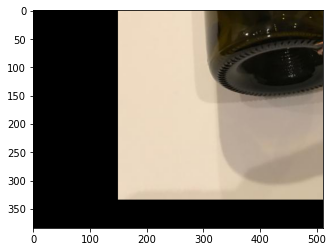

In [ ]:
# Dimensions of the image:
height, width, _ =  original_img.shape

# Translation matrix:
M = np.float32([[1,0,150],[0,1,-50]])

# Shifted image:
shifted_img = cv2.warpAffine(original_img, M, (width, height))
plt.imshow(shifted_img, cmap=None)

#### Filter operations

A **filter** is a local operation of window-type, since it requires the application of a convolution or a correlation, where a *filter matrix* (or *kernel matrix*) slides over the input image, transforming it until the output image is generated. Filters can be used to *denoise an image*, even that the opposite may also be adequate (i.e., more noise can be added to it) in order to make image classification algorithms, for instance, more robust to the kind of inputs it may receive. Filters for noise reduction are called *smoothing filters*. Another important application of filters is *edge detection*, where borders of objects in an image are identified, allowing object segmentation and identification. Filters for edge detection are called *sharpening filters*.

**Linear filters** use the pixels in the original image in a linear way, by just multiplying them by some cofficients and summing them up. Consequently, these coefficients can be represented as entries in the filter matrix. Examples of linear filters for noise reduction are *(moving) average filter*, also known as *box filter* (average of pixels in the neighborhood), and *gaussian filter* (highest values near to the center of the kernel, and decreasing values around it). Some linear filters for sharpening are *gradient filter* (uses first derivatives of the image function), *Laplace filter* (uses second derivatives of the image function; has negative values in the kernel), and *Sobel operator*.

As mentioned before, filtering an image can be seen as moving a filter matrix along the image matrices. This brings up the following components of a filter operation: the *filter matrix*, also known as a kernel, which defines how the image should be transformed; the *local receptive field*, i.e., the neighborhood of the focal point whose size is given by the kernel dimensions; the *hotspot*, center of the local receptive field. There are mainly two ways how linear filter operations can take place: *cross-correlation* and *convolution* operations. Given the kernel and the local receptive field, a cross-correlation implies:
\begin{equation}
  \displaystyle g(i, j) = \sum_{u=-k}^{k}\sum_{v=-k}^k h(u, v)f(i+u, j+v)
\end{equation}

Where $g(i, j)$ is the pixel in position $(i, j)$ of the output image, $f(i, j)$ is the pixel in position $(i, j)$ of the input image, and $h(u, v)$ is the coefficient in position $(u, v)$ of the filter matrix. Similary, a correlation implies:
\begin{equation}
  \displaystyle g(i, j) = \sum_{u=-k}^{k}\sum_{v=-k}^k h(u, v)f(i-u, j-v)
\end{equation}

Note that these operations do not apply immediately for pixels near to the borders of the matrices. In such circumstances, adaptations are used for sliding the kernel along those pixels. Besides, since for each pixel in the output image corresponds a single hotspot in the local receptive field and in the kernel, usually the kernel matrix has odd dimension (i.e., $k$ rows and columns for $k \in \{3, 5, 7, 9, ...\}$).

**Non-linear filters**, in their turn, are given by non-linear operations applied over the neighbors of the input pixel. Examples are *minimum*, *maximum* and *median filters*, which calculate and return as output pixel the minimum, maximum and median value of neighbors pixels. Even that local receptive fields still apply for non-linear filters, it is not possible to define a kernel with linear coefficients for these kind of filters.

Main opencv references for practical filtering of images can be found [here](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html) and [here](https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html).

Finally, all filtering mentioned above occur in the *spatial domain*. Another transformation of filtering type refers to the *frequency domain*, which requires the application of the *Fourier transform*.

Blur (average filter)

[Blur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) and [box filter](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3) are two different ways of applying moving average filter to an image using opencv. While the first implement normalized average filtering, i.e., it divides each kernel entry by the product between kernel width (number of columns) and kernel height (number of rows), the second is more flexible, since it allows the user to choose between normalizing the filter or not.

Below, it is presented two ways of applying (normalized) moving average filter: first, by creating the filter matrix and using [filter2d function](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04), and then by applying the [blur function](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37). The first alternative requires passing to the filter2d function the original image and the kernel, while the blur option requires the original image and the kernel dimensions.

plastic109:


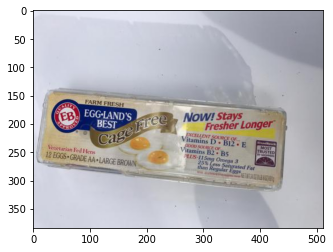

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'{ids_train[sample_idx]}:')
plt.imshow(original_img, cmap=None)

In [ ]:
# Dimension of the filter:
k = 3

# Filter matrix:
filter = np.ones((k,k))*(1/(k*k))
print(filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


plastic109:


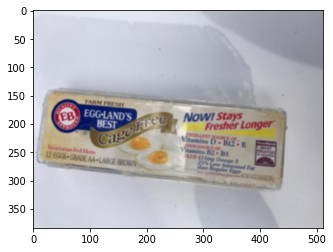

In [ ]:
blurred_img = cv2.filter2D(original_img, -1, filter)
print(f'{ids_train[sample_idx]}:')
plt.imshow(blurred_img, cmap=None)

plastic109:


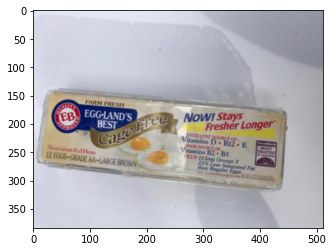

In [ ]:
# Dimension of the filter:
k = 2

# Filter matrix:
filter = np.ones((k,k))*(1/(k*k))

blurred_img = cv2.filter2D(original_img, -1, filter)
print(f'{ids_train[sample_idx]}:')
plt.imshow(blurred_img, cmap=None)

plastic109:


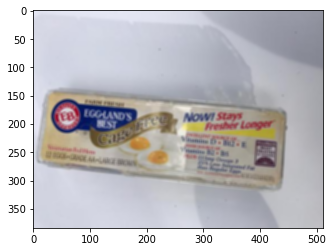

In [ ]:
# Dimension of the filter:
k = 5

# Filter matrix:
filter = np.ones((k,k))*(1/(k*k))

blurred_img = cv2.filter2D(original_img, -1, filter)
print(f'{ids_train[sample_idx]}:')
plt.imshow(blurred_img, cmap=None)

plastic109:


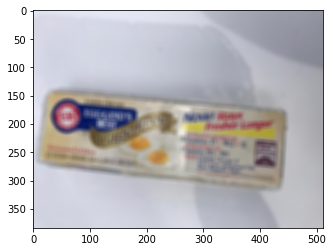

In [ ]:
# Dimension of the filter:
k = 9

# Filter matrix:
filter = np.ones((k,k))*(1/(k*k))

blurred_img = cv2.filter2D(original_img, -1, filter)
print(f'{ids_train[sample_idx]}:')
plt.imshow(blurred_img, cmap=None)

plastic109:


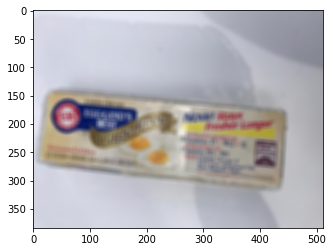

In [ ]:
blurred_img = cv2.blur(original_img, (9,9))
print(f'{ids_train[sample_idx]}:')
plt.imshow(blurred_img, cmap=None)

plastic109:


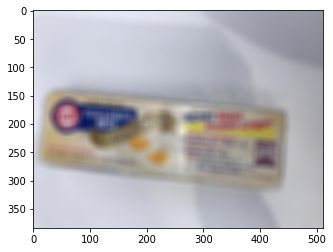

In [ ]:
blurred_img = cv2.blur(original_img, (15,15))
print(f'{ids_train[sample_idx]}:')
plt.imshow(blurred_img, cmap=None)

Gaussian filter

The Gaussian filter is another linear smoothing alternative for blurring an image. The implementation below creates the Gaussian kernel with [getGaussianKernel](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa) class, and then uses again the [filter2d](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) function. Another more direct option is to use [GaussianBlur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1), which requires the original image and the kernel dimensions.

paper103:


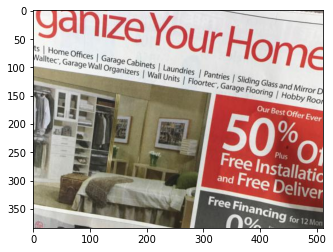

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'{ids_train[sample_idx]}:')
plt.imshow(original_img, cmap=None)

In [ ]:
# Dimension and standard deviation of the filter:
k = 5
std = 1

gauss_1d = cv2.getGaussianKernel(k, std)
print(gauss_1d)

[[0.05448868]
 [0.24420134]
 [0.40261995]
 [0.24420134]
 [0.05448868]]


In [ ]:
gauss_filter = gauss_1d*gauss_1d.transpose(1, 0)
print(gauss_filter)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


paper103:


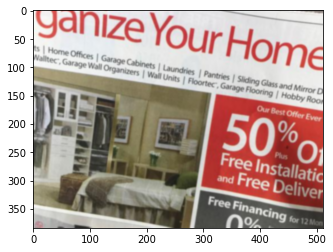

In [ ]:
gauss_img = cv2.filter2D(original_img, -1, gauss_filter)
print(f'{ids_train[sample_idx]}:')
plt.imshow(gauss_img, cmap=None)

paper103:


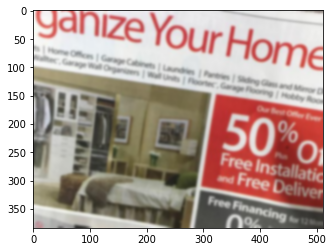

In [ ]:
gauss_img = cv2.GaussianBlur(original_img, (15, 15), 2)
print(f'{ids_train[sample_idx]}:')
plt.imshow(gauss_img, cmap=None)

Median blur

The median blur is a non-linear smoothing alternative for denoising images. The [medianBlur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) function requires the original image and the kernel size.

plastic134:


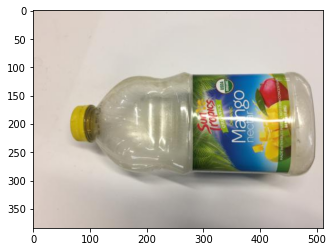

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

print(f'{ids_train[sample_idx]}:')
plt.imshow(original_img, cmap=None)

plastic134:


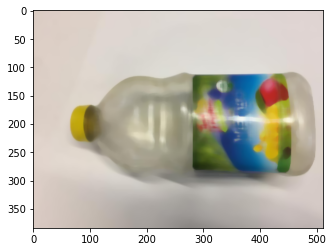

In [ ]:
median_blurred_img = cv2.medianBlur(original_img, 11)
print(f'{ids_train[sample_idx]}:')
plt.imshow(median_blurred_img, cmap=None)

#### Point operations

Changing the brightness

The brightness $\mu$ of a pixel $f(x, y)$ is defined as the average color intensity:
\begin{equation}
  \displaystyle \mu = \frac{f_R(x, y) + f_B(x, y) + f_G(x, y)}{3}
\end{equation}

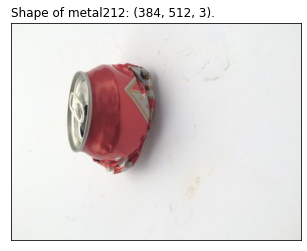

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

plt.imshow(original_img), plt.title(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()

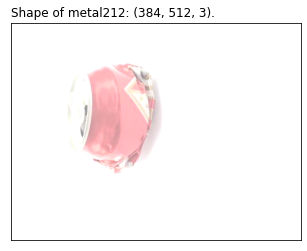

In [ ]:
bright_img = brightness_filter(image=original_img, delta=120)
plt.imshow(bright_img), plt.title(f'Shape of {ids_train[sample_idx]}: {bright_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()

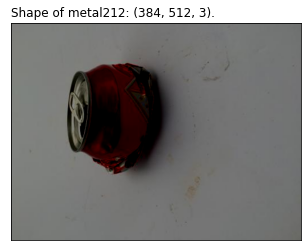

In [ ]:
bright_img = brightness_filter(image=original_img, delta=-120)
plt.imshow(bright_img), plt.title(f'Shape of {ids_train[sample_idx]}: {bright_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()

Changing the contrast

The contrast $C$ of an image $f(.)$ expresses the variability of brightness across all pixels of $f(.)$, and can be mathematically defined as:
\begin{equation}
  \displaystyle C = \frac{\mu_{max} - \mu_{min}}{\mu_{max} + \mu_{min}}
\end{equation}
Where $\mu_{max}$ and $\mu_{min}$ are the highest and the lowest brightness of the image.

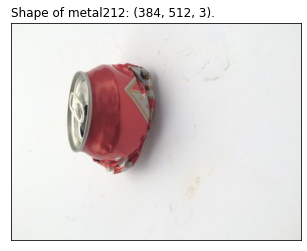

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

plt.imshow(original_img), plt.title(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()

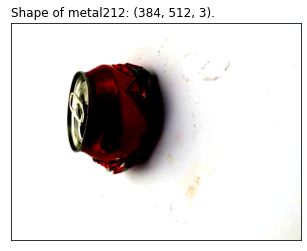

In [ ]:
contrast_img = contrast_filter(image=original_img, beta=120)
plt.imshow(contrast_img), plt.title(f'Shape of {ids_train[sample_idx]}: {bright_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()

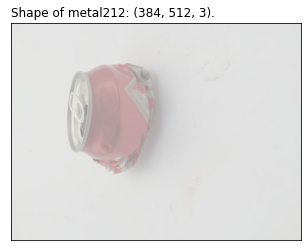

In [ ]:
contrast_img = contrast_filter(image=original_img, beta=-120)
plt.imshow(contrast_img), plt.title(f'Shape of {ids_train[sample_idx]}: {bright_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()

Changing the saturation

Saturation refers to how vivid are the colors in an image.

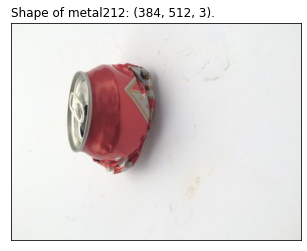

In [ ]:
# Original image:
sample_idx = np.random.choice(range(len(images_train)), size=1)[0]
original_img = images_train[sample_idx].copy()

plt.imshow(original_img), plt.title(f'Shape of {ids_train[sample_idx]}: {original_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


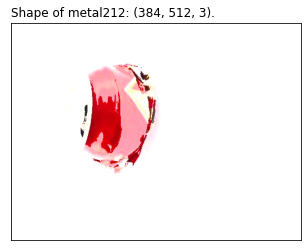

In [ ]:
saturation_img = saturation_filter(image=original_img, beta=120)
plt.imshow(saturation_img), plt.title(f'Shape of {ids_train[sample_idx]}: {bright_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


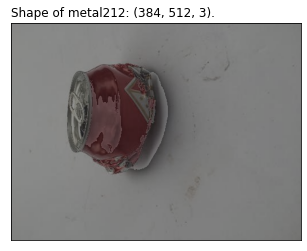

In [ ]:
saturation_img = saturation_filter(image=original_img, beta=-120)
plt.imshow(saturation_img), plt.title(f'Shape of {ids_train[sample_idx]}: {bright_img.shape}.', loc='left')
plt.xticks([]), plt.yticks([])
plt.show()